# Clustering

Clustering is an unsupervised machine learning technique that aims to group similar data points together. It is widely used in various domains, including data analysis, image segmentation, customer segmentation, and more. Clustering algorithms partition the data into subsets or clusters based on their similarities, while maximizing the dissimilarities between different clusters.

In case of classification and regression we are given a set of $x_i$'s and $y_i$'s, while in clustering data consists of only $x_i$'s and no $y_i$'s i.e. $D = {x_i}$. In supervised learning our task was to find the function $y=f(x)$, while in clustering our task is to group/cluster similar data points together. The similar data points here may not represent those lying close to each other, so what does similar mean? similar here is very problem specific.

## Clustering Metrics

The Dunn index is an evaluation metric used to assess the quality of clustering results. It quantifies the compactness of clusters and the separation between different clusters. A higher Dunn index indicates better clustering.

The Dunn index is defined as the ratio between the minimum inter-cluster distance and the maximum intra-cluster distance. The inter-cluster distance measures the dissimilarity between different clusters, while the intra-cluster distance measures the compactness of individual clusters.

Mathematically, the Dunn index is calculated as follows:

$Dunn\ Index = min_{i≠j} \frac{d(i,j)}{max_{k} d(k)}$

where:

- $d(i,j)$ represents the distance between clusters `i` and `j`.
- $d(k)$ represents the diameter of cluster `k`, which is the maximum distance between any two points within that cluster.

The numerator of the Dunn index aims to minimize the inter-cluster distance, ensuring that clusters are well-separated. The denominator aims to maximize the intra-cluster distance, promoting compactness within each cluster.

To calculate the Dunn index for a set of clusters, you need to compute the distances between clusters and the diameters of individual clusters. The cluster distances can be calculated using different distance metrics (e.g., Euclidean distance), and the cluster diameters can be obtained by finding the maximum distance between any two points within each cluster.

By comparing the Dunn index across different clustering results, you can assess which one produces more distinct and compact clusters. However, it's important to note that the Dunn index is just one of many evaluation metrics for clustering, and it should be used in conjunction with other metrics and domain knowledge to make informed decisions.

Keep in mind that the computation of the Dunn index can be computationally expensive, especially for large datasets or a large number of clusters. Therefore, it's essential to consider the scalability of the method when applying it to real-world scenarios.

# K Means Clustering

K-means clustering is one of the most popular and widely used clustering algorithms. It aims to partition the data into K clusters, where `K` is a user-defined parameter. Each cluster is represented by its centroid, which is the mean of all the data points in that cluster. K-means clustering assigns each data point to the cluster with the closest centroid, based on a distance metric. So, k-means clustering is a centroid based clustering scheme.

![K Means Clustering](./../../assets/k-means.jpg)

`k` in k-means is the number of clusters. Each cluster has a set of data points $S_1, S_2, ..., S_k$ such that $S_1 U S_2 U ... U S_k = D$ and $S_1 ∩ S_2  = S_2 ∩ S_3 = ...= S_{k-1} ∩ S_k = \phi$. K-means gives the centroids for each clusters $C_1, C_2, ..., C_k$ where centroid $C_i$ is the mean point of all the points in set $S_i$.

$C_i = \frac{1}{n} \sum_{j=1}^n x_j$

where $n$ = number of elements in set $S_i$ and $x_j ∈ S_i$

The mathematical formulation of k-means states: For each cluster find the value of their centroids $C_1, C_2, ..., C_k$ which minimizes the intra-cluster distance $||x-C_i||^2$ between all the points and the centroid of the cluster which encloses the given point.

\begin{equation}
C_1^*, C_2^*, ..., C_k^* = argmin_{C_1, C_2, ..., C_k} \sum_{i=1}^k \sum_{x ∈ S_i} ||x-C_i||^2
\end{equation}

This optimization equation is very difficult to solve. In computer science, for difficult problems like this we use approximation algorithm which suggests instead of solving problems exactly, we solve it approximately using some hacks and maths. One of the approximation algorithm is Lloyd's algorithm.

## Lloyd's Algorithm

Lloyd's algorithm, also known as the k-means algorithm, is an iterative optimization algorithm used to solve the k-means clustering problem. It aims to partition a given dataset into k clusters, where each data point belongs to the cluster with the nearest centroid.

Here's an overview of the Lloyd's algorithm:

- **Initialization:** Initialize `k` centroids. There are various initialization methods, such as randomly selecting `k` data points as centroids or using more sophisticated techniques like k-means++.

- **Assignment:** Assign each data point to the cluster with the nearest centroid. This step involves calculating the distance between each data point and each centroid, and assigning the data point to the cluster with the minimum distance.

- **Update:** Recalculate the centroids based on the mean of the data points in each cluster. Each centroid is updated by taking the mean of the coordinates of all the data points assigned to its cluster. $C_i = \frac{1}{n} \sum_{x_j ∈ S_i} x_j$

- **Convergence:** Repeat steps 2 and 3 until convergence. Convergence occurs when the centroids no longer change significantly between iterations or when a maximum number of iterations is reached.

- **Output:** Once convergence is reached, the algorithm outputs the final cluster assignments and the coordinates of the centroids.

The key idea behind Lloyd's algorithm is the iterative refinement of the cluster centroids. In each iteration, the algorithm reassigns data points to the nearest centroids and updates the centroids based on the new assignments. This process continues until a stopping criterion is met.

Lloyd's algorithm aims to minimize the total within-cluster sum of squares (WCSS), which represents the sum of squared distances between each data point and its assigned centroid. By minimizing the WCSS, the algorithm optimizes the clustering solution to achieve compact and well-separated clusters.

It's important to note that Lloyd's algorithm can get stuck in local optima, meaning it may not find the globally optimal clustering solution. Therefore, it is common to run the algorithm multiple times with different initializations and choose the clustering solution with the lowest WCSS or based on other evaluation metrics.

## Distance Metrics

The choice of distance metric greatly affects the clustering results. The most commonly used distance metric in K-means clustering is the Euclidean distance, given by the formula:

$Euclidean\ Distance = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$

where $(x_1, y_1)$ and $(x_2, y_2)$ are the coordinates of two data points.

## Initialization Methods

The initial placement of centroids can impact the final clustering. Random initialization may not be aware of initialization sensitivity. So we may get varying results depending upon the choice of initial centroids. This mis-interpretation of clusters due to random choice should be handled somehow. For this, K-means clustering commonly employs two initialization methods:

1. **Multiple Random Initialization:** Randomly initialize `k` clusters for multiple times and select one that gives the minimum value of intra-cluster distance.
2. **K-means++ Initialization:** K-means++ aims to select initial centroids that are well-spaced and distributed across the data space, leading to better clustering results compared to random initialization. Here's how the K-means++ initialization method works:

    - *Select the first centroid randomly:* Choose one data point from the dataset as the first centroid.
    - *Compute the distance:* Calculate the distance between each data point and the selected centroid.
    - *Select the next centroid:* Choose the next centroid from the remaining data points with a probability proportional to its squared distance to the nearest existing centroid. This ensures that data points farther away from existing centroids are more likely to be selected as new centroids.
    - *Repeat:* Repeat steps 2 and 3 until `K` centroids are selected.

## Determining the Optimal K
Choosing an appropriate value of K is essential for meaningful clustering. Here are a few techniques to determine the optimal K:

### Elbow Method

The elbow method is a visual technique that involves plotting the number of clusters against the sum of squared distances between data points and their cluster centroids. The sum of squared distances measures the within-cluster variation. The idea is to identify the number of clusters where adding more clusters does not lead to a significant reduction in the sum of squared distances.

To apply the elbow method, follow these steps:

- Choose a range of possible cluster numbers.
- For each number of clusters, perform K-means clustering on the dataset.
- Calculate the sum of squared distances (inertia) for each clustering result.
- Plot the number of clusters against the corresponding sum of squared distances.
- Look for the "elbow" or bend in the plot where the rate of decrease in the sum of squared distances diminishes significantly.
- The number of clusters at the elbow point is considered a reasonable choice.

![Elbow Methods](./../../assets/elbow.jpg)

The elbow point indicates a trade-off between the number of clusters and the compactness of the data within each cluster. However, it is important to note that the elbow method is subjective, and the choice of the optimal number of clusters may vary depending on the context and domain knowledge.

### Silhouette Analysis

Silhouette analysis is another method for assessing cluster quality and determining the appropriate number of clusters. It provides a measure of how well each data point fits into its assigned cluster, considering both the cohesion within the cluster and the separation from other clusters.
To perform silhouette analysis, follow these steps:

- Choose a range of possible cluster numbers.
- For each number of clusters, perform K-means clustering on the dataset.
- Calculate the silhouette coefficient for each data point. The silhouette coefficient measures the cohesion and separation of a data point within its assigned cluster.

    $s_i = \frac{b_i\ -\ a_i}{max(a_i,\ b_i)}$

    where,
    - $a_i$ = average intra-cluster distance
    - $b_i$ = average inter-cluster distance
    
- Compute the average silhouette coefficient for each clustering result.
- Plot the number of clusters against the corresponding average silhouette coefficient.
- Look for the highest average silhouette coefficient, indicating the number of clusters that best separates the data.

In silhouette analysis, values close to +1 indicate well-separated clusters, values close to 0 indicate overlapping clusters, and negative values suggest that data points may be assigned to the wrong clusters.

By combining the elbow method and silhouette analysis, you can gain a better understanding of the optimal number of clusters. The elbow method provides a measure of compactness, while silhouette analysis offers insights into both compactness and separation. However, it's important to remember that these methods are not definitive and should be used in conjunction with domain knowledge and other evaluation techniques to make an informed decision about the number of clusters.

## Evaluation Metrics

After clustering, it's important to evaluate the quality of the results. Two common evaluation metrics for K-means clustering are:

### WCSS (Within-Cluster Sum of Squares)

- WCSS measures the compactness of the clusters.
- It is the sum of the squared distances between each data point and its centroid within a cluster.
- Lower WCSS indicates better clustering.

### Silhouette Coefficient

- Silhouette coefficient measures how well each sample fits within its cluster.
- It ranges from -1 to 1, where higher values indicate better clustering.
- A value close to 1 indicates that the samples are well-clustered, while a value close to -1 suggests that they may be assigned to the wrong cluster.

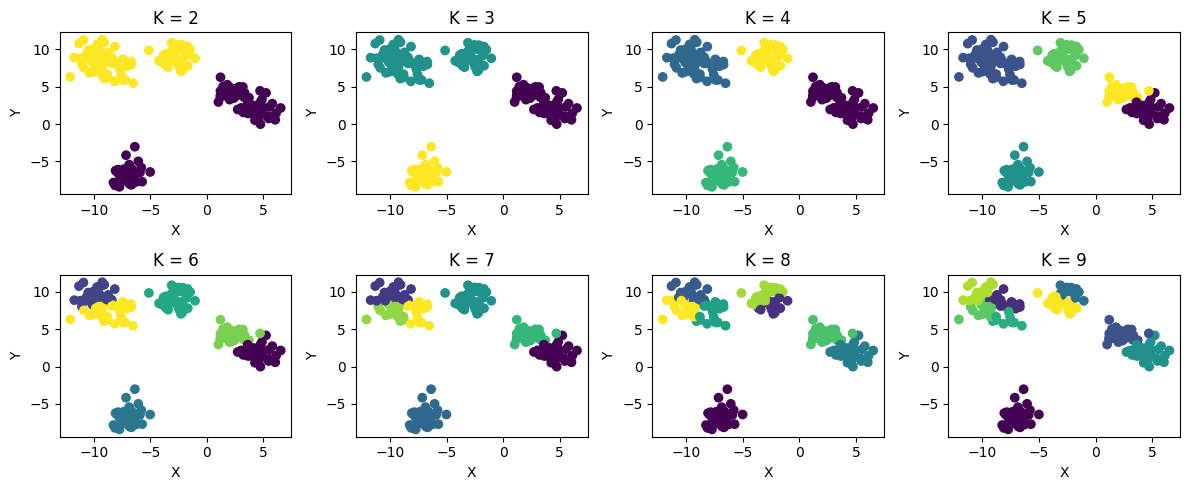

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Generate synthetic data
X, _ = make_blobs(n_samples=200, centers=6, random_state=42)

# Perform K-means clustering for different values of K
k_values = range(2, 10)
wcss = []  # Within-Cluster Sum of Squares
silhouette_scores = []
cluster_assignments = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # WCSS
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    cluster_assignments.append(kmeans.labels_)

# Plot the data clusters
plt.figure(figsize=(12, 5))
for i, clusters in enumerate(cluster_assignments, start=1):
    plt.subplot(2, 4, i)
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
    plt.title(f'K = {i + 1}')
    plt.xlabel('X')
    plt.ylabel('Y')

plt.tight_layout()
plt.show()

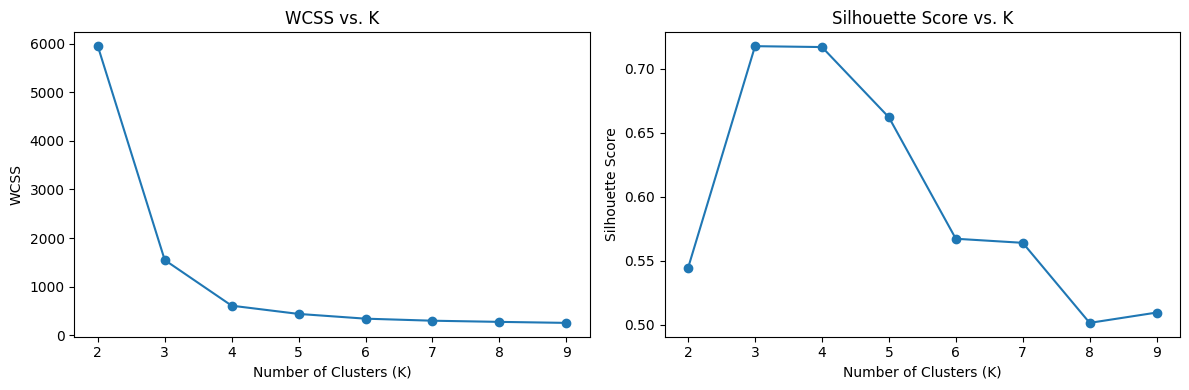

In [2]:
# Plot the WCSS and silhouette scores for different values of K
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, wcss, marker='o')
plt.title('WCSS vs. K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

## K-medoids and Partitioning Around Medoids (PAM)

K-medoids and Partitioning Around Medoids (PAM) are variations of the k-means clustering algorithm that use medoids instead of centroids. While k-means uses the mean (centroid) of the data points in each cluster as a representative, k-medoids and PAM use actual data points (medoids) from the dataset. A medoid can be defined as the data point within a cluster that minimizes the average dissimilarity to all other points in the same cluster.

### Partitioning Around Medoids (PAM)

Partitioning Around Medoids (PAM), is an extension of K-means that replaces centroids with medoids. PAM is an improvement over k-medoids that focuses on finding the optimal medoids.

- It starts by initializing K medoids randomly or using a specified initialization method.
- It then iteratively performs a swap procedure to evaluate the cost (total dissimilarity) of swapping each medoid with other non-medoid points in the cluster.
- If a swap reduces the total cost, the medoid is updated with the new data point.
- The process continues until no more improvements can be made or reaching the maximum number of iterations.

K-medoids and PAM are advantageous in scenarios where using centroids might not be appropriate, such as when dealing with categorical or non-numerical data. They can handle various distance metrics and are less sensitive to outliers compared to k-means.

The choice between k-means and k-medoids/PAM depends on the nature of the data and the problem at hand. If your data can be represented by means (numerical data), k-means may be more suitable. On the other hand, if your data has a categorical nature or you want more robustness against outliers, k-medoids or PAM can be better choices.

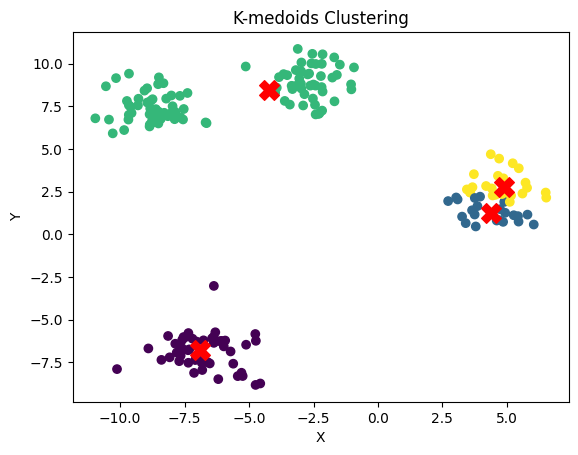

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
from sklearn_extra.cluster import KMedoids

# Generate synthetic data
X, _ = make_blobs(n_samples=200, centers=4, random_state=42)

# Perform K-medoids clustering
k = 4  # Number of clusters
kmedoids = KMedoids(n_clusters=k, random_state=42)
kmedoids.fit(X)

# Get cluster assignments and medoids
cluster_assignments = kmedoids.labels_
medoids = kmedoids.cluster_centers_

# Plot the data clusters and medoids
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis')
plt.scatter(medoids[:, 0], medoids[:, 1], marker='X', color='red', s=200)
plt.title('K-medoids Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## References

- [Scikit-learn documentation](https://scikit-learn.org/stable/modules/clustering.html)
- [Introduction to K-means Clustering in Exploratory](https://medium.com/learn-dplyr/introduction-to-k-means-clustering-in-exploratory-8352650f1185)
- [A Practical Guide to K-means Clustering](https://towardsdatascience.com/a-practical-guide-on-k-means-clustering-ca3bef3c853d)
- [K-means Clustering in Python (Tutorial)](https://realpython.com/k-means-clustering-python/)
- [Hands-On Unsupervised Learning Using Python by Ankur A. Patel.](https://github.com/aapatel09/handson-unsupervised-learning)
- [Silhouette Analysis in K-means Clustering](https://medium.com/@cmukesh8688/silhouette-analysis-in-k-means-clustering-cefa9a7ad111)